# Saving and loading Model in Pytorch.

In [1]:
# Importing Libraries
import torch
from torch import nn, optim
import torch.nn.functional as F
from torchvision import datasets, transforms
import fc_model
import matplotlib.pyplot as plt

## Dataset.

In [2]:
# Define a transform
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, ), (0.5, ))])

# Loading train data
trainset = datasets.FashionMNIST(root="../Data/", download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(dataset=trainset, batch_size=64, shuffle=True)

# Loading test data
testset = datasets.FashionMNIST(root="../Data/", download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(dataset=testset, batch_size=64, shuffle=True)

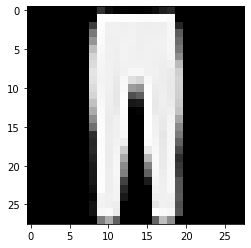

In [3]:
image, label = next(iter(trainloader))
plt.imshow(image[0,:].reshape(28, 28), cmap='Greys_r')
plt.show()

## Train model.

In [4]:
# Create model, loss function and optimizer

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.670..  Test Loss: 0.933..  Test Accuracy: 0.654
Epoch: 1/2..  Training Loss: 1.011..  Test Loss: 0.776..  Test Accuracy: 0.710
Epoch: 1/2..  Training Loss: 0.849..  Test Loss: 0.670..  Test Accuracy: 0.745
Epoch: 1/2..  Training Loss: 0.773..  Test Loss: 0.650..  Test Accuracy: 0.744
Epoch: 1/2..  Training Loss: 0.788..  Test Loss: 0.625..  Test Accuracy: 0.761
Epoch: 1/2..  Training Loss: 0.716..  Test Loss: 0.590..  Test Accuracy: 0.772
Epoch: 1/2..  Training Loss: 0.678..  Test Loss: 0.598..  Test Accuracy: 0.766
Epoch: 1/2..  Training Loss: 0.730..  Test Loss: 0.570..  Test Accuracy: 0.781
Epoch: 1/2..  Training Loss: 0.673..  Test Loss: 0.552..  Test Accuracy: 0.793
Epoch: 1/2..  Training Loss: 0.653..  Test Loss: 0.581..  Test Accuracy: 0.786
Epoch: 1/2..  Training Loss: 0.639..  Test Loss: 0.548..  Test Accuracy: 0.796
Epoch: 1/2..  Training Loss: 0.604..  Test Loss: 0.536..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.638..  Test Loss: 0.5

## Saving and loading networks.

In [6]:
# We actually save state_dict which holds values of weights and biases

print("Our model:\n", model)
print("The state dict:\n", model.state_dict().keys())

Our model:
 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
The state dict:
 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [7]:
# Saving model dictionary
torch.save(model.state_dict(), "checkpoint.pth")

In [9]:
# Loading model dictionary
state_dict = torch.load("checkpoint.pth")
print(state_dict.keys())

odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


In [10]:
# Loading into model
model.load_state_dict(state_dict)

<All keys matched successfully>

In [11]:
# But this model is not work with another architechture now
# So we have to include information of model in checkpoint itself
checkpoint = {
    "input_size": 784,
    "output_size": 10,
    "hidden_layers": [each.out_features for each in model.hidden_layers],
    "state_dict": model.state_dict()
}

# Now save this as checkpoint
torch.save(checkpoint, "checkpoint.pth")

In [12]:
# Now we load this and create new model with this information
def load_checkpoint(filepath):

    checkpoint = torch.load(filepath)
    model = fc_model.Network(checkpoint["input_size"],
                             checkpoint["output_size"],
                             checkpoint["hidden_layers"])
    model.load_state_dict(checkpoint["state_dict"])

    return model

In [13]:
model = load_checkpoint("checkpoint.pth")
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)
